In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Question1
#first we need to get a number from our user, and we just print it out
numToConvert = input("enter a number: ")
print("num in decimal = " + str(numToConvert))
#we use the build in method bin to convert our number from deciaml to binary
numInBin = bin(int(numToConvert))
print("num in binary = " + str(numInBin).replace("0b",""))#Bin method placed 0b in the start of the number thet means its 
#binary, we just remove it
#we use the build in method hex to convert our number from deciaml to Hex
numInHex = hex(int(numToConvert))
print("num in Hex = " + str(numInHex).replace("0x",""))
#hex method placed 0x at the start of the number that means its in hexadecimal base so we just remove it
#we use the build in method oct to convert our number from deciaml to octal
numInOctal = oct(int(numToConvert))
print("num in Octal = " + str(numInOctal).replace("0o",""))
#hex method placed 0o at the start of the number that means its in octal base so we just remove it

enter a number: 66666
num in decimal = 66666
num in binary = 10000010001101010
num in Hex = 1046a
num in Octal = 202152


In [4]:
dfCast = pd.read_csv("D:\dataFrames\cast.csv")
dfCast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [128]:
#Question 2: How many movies have the title "Hamlet"?
#using loc on the title column to find all rows where the movie is named Hamlet
dfHamlet = dfCast.loc[dfCast["title"] == "Hamlet"]
dfsameYear = dfHamlet.groupby(dfHamlet['year'])
#because there are alot of rows with the same movie, we use groupby() to group them by the years to see how may
#hamlet movies there are
#counting the amount of rows in our group by object
count = 0
for movie in dfsameYear:
    count = count+1
#there are 17 movies named Hamlet in the data set
print("there are " + str(count) + " movies named hamlet") 

there are 17 movies named hamlet


In [96]:
#Question 3: List all of the "Treasure Island" movies from earliest to most recent.
#using loc on the title column to find all rows where the movie is named Treasure island
dfTreasureIsland = dfCast.loc[dfCast["title"] == "Treasure Island"]
#sorting the df value by the columns named "year" from oldest to most recent
dfSortedByYear = dfTreasureIsland.sort_values(by=["year"])
df= dfSortedByYear.groupby(dfSortedByYear['year'])
print(df.describe())
dfSortedByYear

         n                                                   
     count       mean       std  min   25%   50%    75%   max
year                                                         
1918   6.0   3.500000  1.870829  1.0  2.25   3.5   4.75   6.0
1920  12.0   5.916667  3.175426  1.0  3.75   5.5   8.25  11.0
1934  19.0  10.000000  5.627314  1.0  5.50  10.0  14.50  19.0
1950  34.0  17.500000  9.958246  1.0  9.25  17.5  25.75  34.0
1972  18.0   9.333333  5.201810  1.0  5.25   9.5  12.75  18.0
1973   7.0   3.428571  1.718249  1.0  2.50   3.0   4.50   6.0
1985  15.0   7.400000  4.049691  1.0  4.50   7.0  10.50  14.0
1999  24.0  11.958333  6.766151  1.0  6.75  11.5  18.25  23.0


,title,year,name,type,character,n
1312766,Treasure Island,1918,Herschel Mayall,actor,Prologue Player,NaN
3280557,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN
3046750,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0
1167783,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN
1195421,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN
...,...,...,...,...,...,...
1663860,Treasure Island,1999,Victor Raider-Wexler,actor,Samowitz,10.0
1731182,Treasure Island,1999,Scot Thomas Robinson,actor,Jimmy,11.0
1813707,Treasure Island,1999,Richard Schave,actor,Man,21.0
2710458,Treasure Island,1999,Stephanie Ittleson,actress,Stella,7.0


In [50]:
#Question 4: How many roles were credited in the silent 1921 version of Hamlet?
#finding the 1921 version of hamlet with all the actors
df1921 = dfHamlet.loc[dfHamlet["year"] == 1921]
#the amount of rows is the amount of roles thet were credited
print(str(df1921.shape[0])+ " roles were credited in the 1921 version of hamlet")

9 roles were credited in the 1921 version of hamlet


(array([3., 1., 0., 1., 1., 2., 2., 1., 2., 4.]),
 array([1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980., 1990.,
        2000., 2010.]),
 <a list of 10 Patch objects>)

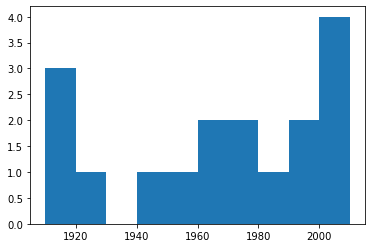

In [146]:
#Question 5:Use groupby() to plot the number of "Hamlet" films made each decade
#we have athe amount of hamlet movies made from a previous question, and we know that there are 17
#hamlet movies so we make a size 17 array
y = np.arange(17)
i = 0;
#we enter the decade of the movie by taking down then last digit(singels digit)
for index in dfsameYear.describe().index:
    y[i] = index/10
    i = i +1
#we mulitply it all by 10 to get the decades
y= y*10
#use hist to shouw the amount of movies made each decade
plt.hist(y)

In [92]:
#Question 6: How many leading (n=1) roles were available to actors, and how many to
#actresses, in each year of the 1950s?
#first we get the movies thet were created between 1950 and 1959
df1950s = dfCast.loc[dfCast["year"] > 1949]
df1950s = df1950s.loc[df1950s["year"] < 1960]
#create an array for leading actor and actress roles, the cell represents the year [0] = 1950,[1] = 1951 and so on
leadingActorsCount = np.zeros(10)
leadingActressesCount = np.zeros(10)
#looping on all the indexes of movies in our dataframe
for index in df1950s.index:
    #cheking if our n was 1 (lead) and if the type was actor or actress
    if((df1950s['n'][index] == 1 )):
        year = df1950s['year'][index]
        num_of_year = year%10
        if(df1950s['type'][index] == "actor"):
            leadingActorsCount[num_of_year] = leadingActorsCount[num_of_year] +1
        elif(df1950s['type'][index] == "actress"):
            leadingActressesCount[num_of_year] = leadingActressesCount[num_of_year] +1
#looping on our index from 0 to 9 to print the amount of leading roles avialable every year for actors
#and acresses
for i in range(10):
    print("there were " + str(leadingActorsCount[i]) + " avialable lead roles for actors in " + str(1950+i))
    print("there were " + str(leadingActressesCount[i]) + " avialable lead roles for Actresses in " + str(1950+i))

there were 604.0 avialable lead roles for actors in 1950
there were 271.0 avialable lead roles for Actresses in 1950
there were 633.0 avialable lead roles for actors in 1951
there were 272.0 avialable lead roles for Actresses in 1951
there were 591.0 avialable lead roles for actors in 1952
there were 284.0 avialable lead roles for Actresses in 1952
there were 634.0 avialable lead roles for actors in 1953
there were 290.0 avialable lead roles for Actresses in 1953
there were 626.0 avialable lead roles for actors in 1954
there were 298.0 avialable lead roles for Actresses in 1954
there were 606.0 avialable lead roles for actors in 1955
there were 264.0 avialable lead roles for Actresses in 1955
there were 614.0 avialable lead roles for actors in 1956
there were 288.0 avialable lead roles for Actresses in 1956
there were 708.0 avialable lead roles for actors in 1957
there were 284.0 avialable lead roles for Actresses in 1957
there were 694.0 avialable lead roles for actors in 1958
there w

In [43]:
#Question 7:List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's
#we reduce the movies to only movies that were created after 1989
df1990s = dfCast.loc[dfCast['year'] > 1989]
#we then reduce it more to conation only the leading actors
dfLeading = df1990s.loc[dfCast['n'] == 1]
#we group it by name so we can see how many time a name appeard
dfMost = dfLeading.groupby(dfLeading['name'])
#and then we sort it by the count of time to see the first 10 with most apearences as leading actors
dfMost.count().sort_values(by = ['year']  , ascending=False).head(10)

,title,year,type,character,n
name,,,,,
Mohanlal,126,126,126,126,126
Mammootty,118,118,118,118,118
Akshay Kumar,87,87,87,87,87
Jayaram,76,76,76,76,76
Andy Lau,72,72,72,72,72
Ajay Devgn,69,69,69,69,69
Amitabh Bachchan,68,68,68,68,68
Eric Roberts,68,68,68,68,68
Nagarjuna Akkineni,60,60,60,60,60


In [125]:
#Queation 8: List, in order by year, each of the films in which Frank Oz has played more than
#1 role
#take all the movies that Frank Oz is in them and then sort it by year
dfFrank = dfCast.loc[dfCast['name'] == "Frank Oz"]
dfFrank = dfFrank.sort_values(by = ['year'])
dfMoreThen1 = dfFrank.groupby(dfFrank["title"])
#we take only the year column of the groupby object and sort it by decendeing coung
dfMoreThen1= dfMoreThen1['year']
dfMoreThen1 = dfMoreThen1.describe().sort_values(by = ['count'], ascending=False)
#we loop on all the movies and drop the rows where the count is 1
for ind in dfMoreThen1.index:
    if(dfMoreThen1['count'][ind] == 1):
        dfMoreThen1 = dfMoreThen1.drop(index = ind)
#remove unesecery columns and change names
dfMoreThen1 = dfMoreThen1.drop(columns= ['std','min','25%','50%','75%','max'])
dfMoreThen1 = dfMoreThen1.rename(columns = {'mean': 'Year'})
dfMoreThen1

,count,Year
title,,
The Muppet Movie,8.0,1979.0
The Muppets Take Manhattan,7.0,1984.0
The Muppet Christmas Carol,7.0,1992.0
The Great Muppet Caper,6.0,1981.0
Muppet Treasure Island,4.0,1996.0
Muppets from Space,4.0,1999.0
Sesame Street Presents: Follow that Bird,3.0,1985.0
The Adventures of Elmo in Grouchland,3.0,1999.0
An American Werewolf in London,2.0,1981.0
